In [4]:
import torch 
import time
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [5]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [6]:
x = [[3,4], [4,2], [5,2], [6,8]]
y = [[3], [2], [3], [7]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [7]:
class MyNet(nn.Module):
    def __init__(self):
        super().__init__() # inherit nn module
        # layers
        self.input_to_hidden = nn.Linear(in_features=2, out_features=7, bias=True) # two inputs, 7 outputs
        self.hidden_activation = nn.ReLU()
        self.hidden_to_output = nn.Linear(in_features=7, out_features=1, bias=True) # 7 inputs, 1 output

    # forward pass
    def forward(self, x):
        x = self.input_to_hidden(x)
        x = self.hidden_activation(x)
        x = self.hidden_to_output(x)
        return x

# reproduce values
torch.manual_seed(3)
mynet = MyNet()
# print('weights:\n', mynet.input_to_hidden.weight) # weights only
print('parameters:\n', list(mynet.parameters())) # weights and biases

parameters:
 [Parameter containing:
tensor([[-0.7011, -0.5578],
        [-0.3029, -0.6690],
        [-0.0401, -0.6221],
        [ 0.3845,  0.3446],
        [ 0.1335,  0.5485],
        [-0.0693,  0.4235],
        [-0.4952, -0.1393]], requires_grad=True), Parameter containing:
tensor([-0.6305, -0.0574, -0.4588,  0.6352,  0.4912,  0.5301,  0.2097],
       requires_grad=True), Parameter containing:
tensor([[-0.2156,  0.3396, -0.3688, -0.2412, -0.2361, -0.1567,  0.0754]],
       requires_grad=True), Parameter containing:
tensor([-0.2863], requires_grad=True)]


In [8]:
# # define neural net using nn.Parameter
# class MyNet2(nn.Module):
#     def __init__(self, *args, **kwargs):
#         super().__init__(*args, **kwargs)
#         self.input_to_hidden = nn.Parameter(torch.rand(2, 7))
#         self.hidden_activation = nn.ReLU()
#         self.hidden_to_output = nn.Parameter(torch.rand(8, 1))

#     # forward pass
#     def forward(self, x):
#         x = x @ self.input_to_hidden
#         x = self.hidden_activation(x)
#         x = x @ self.hidden_to_output
#         return x 

# # reproduce values
# torch.manual_seed(3)
# mynet = MyNet2()
# # print('weights:\n', mynet.input_to_hidden.weight) # weights only
# print('\nparameters:\n', list(mynet.parameters())) # weights and biases

In [9]:
loss_func = nn.MSELoss() # loss function, mean squared error
_Y = mynet(X) # predict 
loss_value = loss_func(_Y, Y) # calculate loss
print(loss_value) 

tensor(43.3236, grad_fn=<MseLossBackward0>)


In [10]:
loss_history = []
# optimizer 
opt = SGD(mynet.parameters(), lr=0.001)
for i in range(50):
    opt.zero_grad() # flush previous epochs grads
    loss_value = loss_func(mynet(X), Y) # calculate loss
    # back prop
    loss_value.backward()
    opt.step() # update weights
    # append current loss to loss history
    loss_history.append(loss_value.item())

In [11]:
print('initial epoch loss: ', loss_history[0])
print('final epoch loss: ', loss_history[-1])

initial epoch loss:  43.32361602783203
final epoch loss:  0.24372059106826782


Text(0.5, 1.0, 'Loss over increasing epochs')

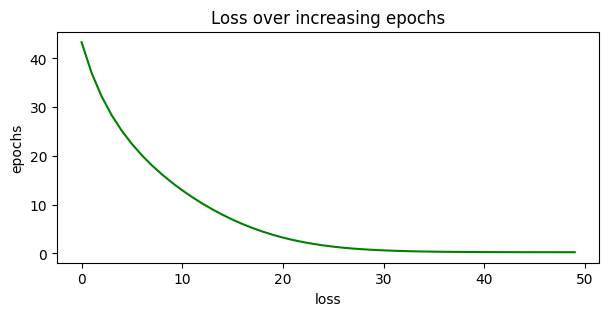

In [12]:
# plot loss history
plt.figure(figsize=(7, 3))
plt.plot(loss_history, color='green')
plt.xlabel('loss')
plt.ylabel('epochs')
plt.title('Loss over increasing epochs')

## Dataset, Dataset Loader, Bactch size

In [33]:
# custom dataset
x = [[3,4], [3,2], [5,1], [6,8]]
y = [[3], [2], [3], [7]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

class MyDataset(Dataset):
    def __init__(self, x, y):
        super().__init__()
        self.x = torch.tensor(x).float()
        self.y = torch.tensor(y).float()
    
    def __len__(self):
        return len(self.x) # len of dataset
    
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix] # get specific row of data

# instances
data_set = MyDataset(X, Y)
# dataloader
dl = DataLoader(data_set, batch_size=2, shuffle=True)
# print batches
i = 0
for x, y in dl:
    i += 1
    print(f'batch {i}:\n', x, y)

print('dataset length: ', data_set.__len__())
print('dataset row 0: ', data_set.__getitem__(0))
print('dataset row 1: ', data_set.__getitem__(1))
print('dataset row 2: ', data_set.__getitem__(2))
print('dataset row 3: ', data_set.__getitem__(3))
# print('dataset row 4: ', data_set.__getitem__(4)) out of bound , we have 4 rows

batch 1:
 tensor([[5., 1.],
        [3., 2.]]) tensor([[3.],
        [2.]])
batch 2:
 tensor([[6., 8.],
        [3., 4.]]) tensor([[7.],
        [3.]])
dataset length:  4
dataset row 0:  (tensor([3., 4.]), tensor([3.]))
dataset row 1:  (tensor([3., 2.]), tensor([2.]))
dataset row 2:  (tensor([5., 1.]), tensor([3.]))
dataset row 3:  (tensor([6., 8.]), tensor([7.]))


In [34]:
# neural net training with batches
class MyNeuralNet3(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.input_to_hidden = nn.Linear(2, 8)
        self.hidden_activation = nn.ReLU()
        self.hidden_to_output = nn.Linear(8, 1)
    def forward(self, x):
        x = self.input_to_hidden(x)
        x = self.hidden_activation(x)
        x = self.hidden_to_output(x)
        return x

# instance
mynet3 = MyNeuralNet3()
loss_func3 = nn.MSELoss()
opt = SGD(mynet3.parameters(), lr=0.01)
loss_history3 = []
start = time.time()
for i in range(50):
    for data in dl:
        # flush previous epochs grads
        opt.zero_grad()
        loss_value3 = loss_func3(mynet3(x), y)
        loss_value3.backward()
        opt.step() # update weights
        loss_history3.append(loss_value3.item())
end = time.time()
print(end - start)

0.5946784019470215


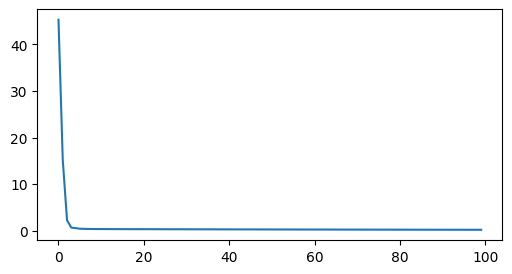

In [35]:
plt.figure(figsize=(6, 3))
plt.plot(loss_history3)

In [37]:
# predict new values
val_x = [[10, 15]]
val_x = torch.tensor(val_x).float()
mynet(val_x)

tensor([[11.2401]], grad_fn=<AddmmBackward0>)